# Edge detection

## This is another technique to identify the objects from an image. 
## Till the time we have run many techniques but still no technique is able to detect the object properly 

### In this technique we will try to find out-line of the house so that we can use it for future purpose.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

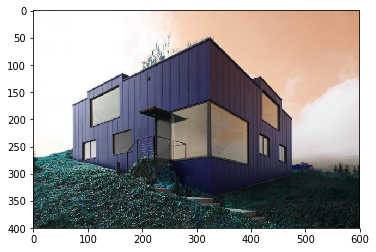

In [2]:
#Let's read corner-house image again
img = cv2.imread('corner-house.jpg')
#In this plot image will look slightly different 
#It is because we haven't changed it from open cv format (BGR) to matplotlib format (RGB)
plt.imshow(img)

### Now we will calculate the median of this image
### We need this median as we need to give threshold for tolerence of edge.
### This threshold values gives approx figures to distinguish one edge to another.

In [6]:
#Median of the image
median_value = np.median(img) 

In [8]:
#Now we will calculate the lower and upper threshold using 30% margin
lower = int(max(0, 0.7* median_value))
upper = int(min(255, 1.3* median_value))

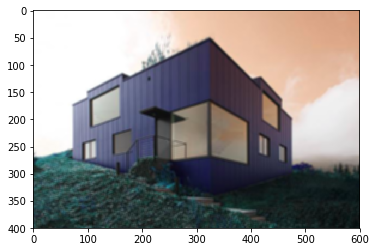

In [12]:
### Now we will blur the image. Bluring is a technique to bring out the main object from the image.
### Ksize is the chunk size in which image should be blurred
blurred_img = cv2.blur(img,ksize=(5,5))
plt.imshow(blurred_img)

In [13]:
#Now lets get the edges of the image
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

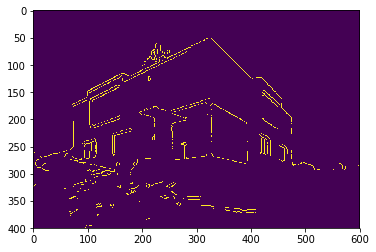

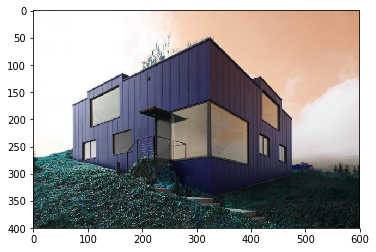

In [11]:
#let's have a look
plt.imshow(edges)
plt.show()
plt.imshow(img)
plt.show()

### Considering above output we can see that edge detection technique has worked out very well  and it have given us the exact outline of the house.

## Now let's use blurred image & image with edges to get the corners. This will help us to understand whether we can use these techniques for our project or not. 

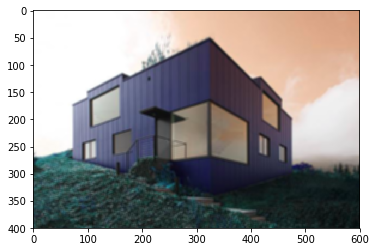

In [14]:
#Corner detection on blured image
blured_copy = blurred_img.copy()
#converting images from Open Cv compatibility to matplot lib compatibility, so that we can plot them for comparison
main = cv2.cvtColor(blured_copy, cv2.COLOR_BGR2RGB)
#just displaying the image
plt.imshow(blured_copy)

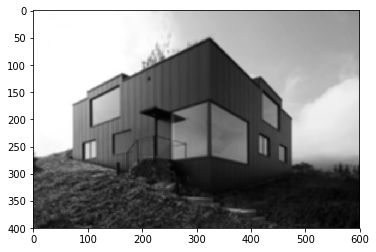

In [15]:
#Converting blured image values to grayscale for better detection
grayscale_house = cv2.cvtColor(blured_copy,cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_house,cmap='gray')

#Converting image values to float . It is needed for this technique
gray = np.float32(grayscale_house)
plt.imshow(gray,cmap='gray')

In [19]:
#Applying good feature formulla & converting the result to int
good_feature = cv2.goodFeaturesToTrack(gray, 10, 0.01, 10)
good_feature = np.int0(good_feature)

In [20]:
#Drawing circle on the detected corners
for coordinate in good_feature:
    #get value of x, y
    x,y = coordinate.ravel()
    #Draw a circle on coloured image at the x & y location
    cv2.circle(blurred_img, (x,y), 3, (255,0,0), -1)

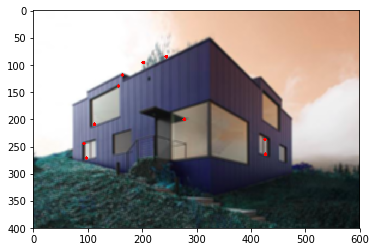

In [21]:
plt.imshow(blurred_img)

## From the output we can understand that bluring has effected but not much as all of the corners found are on the house but still they are not on the desired spots.

### Lets try image with edges

In [22]:
#Corner detection on image with edges
edges = edges.copy()
#converting images from Open Cv compatibility to matplot lib compatibility, so that we can plot them for comparison
main = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
#just displaying the image
plt.imshow(edges)

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


## Above error is intentional
## It shows that we can't further process the image with edge detection. 

### Considering above results we need to further explore the detection techniques so that we can use them for our purpose.